In [1]:
import numpy as np
import random
import sys
import matplotlib.pyplot as plt
import pandas as pd
a = sys.path.append('../modules/') # endereco das funcoes implementadas por voce!
import plot_3D, auxiliars, salve_doc, sphere, sample_random, Operators

In [2]:
acquisition =  {'nx': 100,
                  'ny': 100,
                  'xmin': -10000,
                  'xmax': 10000,
                  'ymin': -10000,
                  'ymax': 10000,
                  'z': -100.0,
                  'color': '.r'}

cood_bounds = {'xmax': 250.0,
                'xmin': 40.0,
                'ymax': 100.0,
                'ymin': 0.0,
                'zlim': 150,
                'z_min': 100,
                'n': 5}

mag_bounds = {'inclmax': -20.0,
                'inclmin': 15.0,
                'declmax': 20.0,
                'declmin': -15.0,
                'magmax': 5.0,
                'magmin': 1.0,
                'homogeneo': True,
                'n': 5}

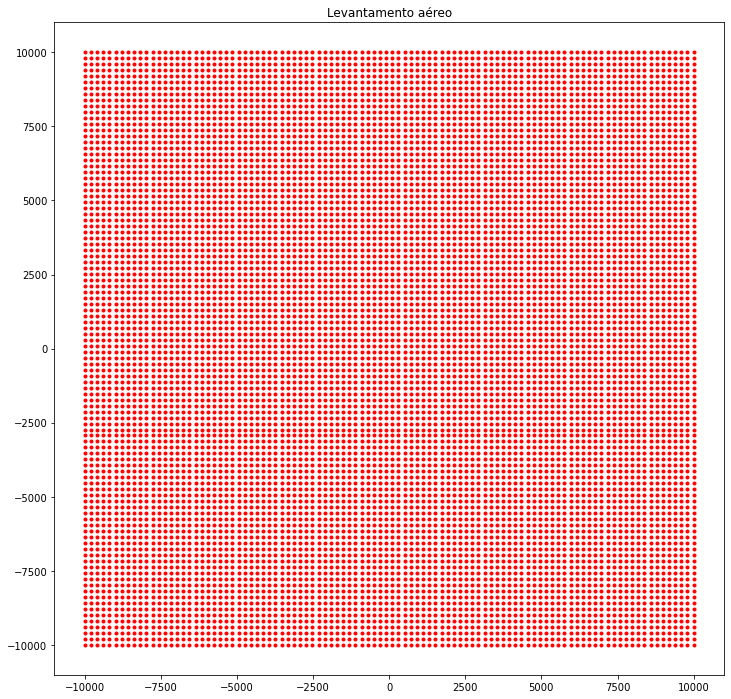

In [3]:
coodX, coodY, coodZ = sample_random.sample_random_coordinated(**cood_bounds)

incl, decl, mag = sample_random.sample_random_mag(**mag_bounds)

x, y, X, Y, Z = plot_3D.create_aquisicao(**acquisition)

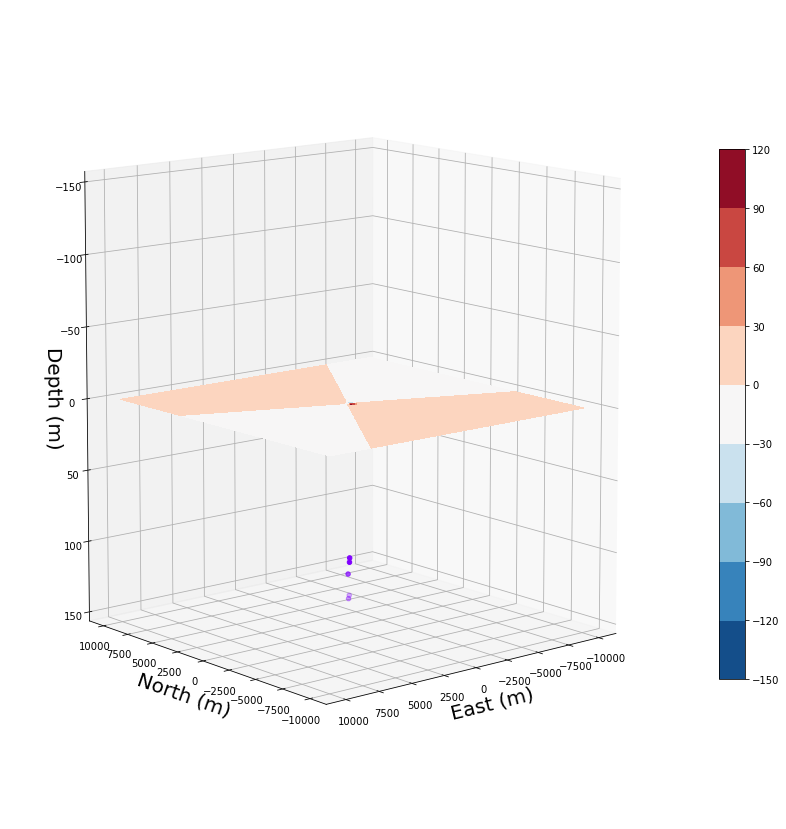

In [4]:
balls_mag = {'incl': incl,
               'decl': decl,
               'mag': mag,
               'n': 5,
               'Xref': X,
               'Yref': Y,
               'Zref': Z,
               'I': 30.0,
               'D': 50.0,
               'coodX': coodX,
               'coodY': coodY,
               'coodZ': coodZ,
               'raio': 100.0}

tfa_n_bolinhas = sample_random.tfa_n_dots(**balls_mag)

plot_3D.modelo_anomalia_3D(Y, X, tfa_n_bolinhas, coodY, coodX, coodZ, mag)

In [13]:
population = {'xmax': 10000.0,
                'xmin': -10000.0,
                'ymax': 10000.0,
                'ymin': -10000.0,
                'zlim': 150.0,
                'z_min': 0.0,
                'n_dip': 10,
                'n_pop': 100,
                'inclmax': -80.0,
                'inclmin': 15.0,
                'declmax': 172.0,
                'declmin': -15.0,
                'magmax': 5.0,
                'magmin': 0.5,
                'homogeneo': True
                }

pop = Operators.create_population(**population)
print(pop)
print(len(pop[0]))

[array([[-3.55520e+03, -4.78070e+02,  1.37760e+02, -2.06700e+01,
         3.56300e+01,  4.86000e+00],
       [ 8.82843e+03,  1.42786e+03,  1.56000e+01, -2.06700e+01,
         3.56300e+01,  4.86000e+00],
       [ 3.47333e+03,  7.63721e+03,  1.05800e+02, -2.06700e+01,
         3.56300e+01,  4.86000e+00],
       [-3.11122e+03,  5.86279e+03,  1.12800e+02, -2.06700e+01,
         3.56300e+01,  4.86000e+00],
       [-1.01431e+03,  8.16060e+03,  8.17100e+01, -2.06700e+01,
         3.56300e+01,  4.86000e+00],
       [-5.09452e+03,  1.96538e+03,  1.00930e+02, -2.06700e+01,
         3.56300e+01,  4.86000e+00],
       [ 5.89700e+01,  3.13345e+03,  7.04300e+01, -2.06700e+01,
         3.56300e+01,  4.86000e+00],
       [-5.42304e+03,  9.93469e+03,  1.11550e+02, -2.06700e+01,
         3.56300e+01,  4.86000e+00],
       [-4.78256e+03, -7.10312e+03,  5.03500e+01, -2.06700e+01,
         3.56300e+01,  4.86000e+00],
       [-2.20863e+03, -8.05730e+02,  5.97300e+01, -2.06700e+01,
         3.56300e+01,  4.8

In [6]:
I, D = 30.0, 50.0
fit_cada = Operators.fit_value(X, Y, Z, I, D, pop, tfa_n_bolinhas)
print(fit_cada)

[1569.06, 1343.44, 896.47, 1080.75, 1190.63, 831.37, 211.44, 371.02, 599.6, 298.09, 2437.28, 2154.38, 178.31, 258.93, 219.85, 2460.38, 3802.08, 174.25, 490.55, 713.18, 1422.73, 1967.95, 148.3, 607.94, 341.07, 881.0, 2484.46, 926.3, 286.86, 789.23, 769.31, 193.37, 1424.92, 236.76, 1693.87, 3310.65, 882.23, 194.51, 512.55, 837.69, 1994.53, 346.26, 243.74, 179.2, 1332.92, 361.83, 415.31, 489.68, 1154.72, 295.06, 2294.37, 650.97, 141.4, 129.69, 530.97, 743.21, 1621.04, 489.08, 510.78, 279.42, 755.76, 623.51, 5207.89, 1422.38, 324.06, 2067.0, 972.76, 1756.98, 1744.69, 136.87, 755.26, 134.49, 811.03, 107.72, 129.8, 129.29, 450.72, 144.23, 524.83, 260.94, 686.53, 688.74, 2098.99, 1091.48, 1484.84, 218.74, 1322.0, 1588.67, 1787.79, 1729.51, 764.99, 365.49, 6193.33, 930.8, 264.16, 1856.37, 258.32, 186.74, 136.31, 1313.83]


In [7]:
'''#PLOT DOS FITNESS INICIAIS

x_param = list(range(100))
print(len(fit_cada), len(x_param))

fig = plt.figure(figsize=(10, 12))
plt.bar(x_param, fit_cada, align = 'center', color = 'r')

plt.show()
'''

"#PLOT DOS FITNESS INICIAIS\n\nx_param = list(range(100))\nprint(len(fit_cada), len(x_param))\n\nfig = plt.figure(figsize=(10, 12))\nplt.bar(x_param, fit_cada, align = 'center', color = 'r')\n\nplt.show()\n"

In [30]:
pais_torneio = Operators.tournament_selection(pop, fit_cada)
print(pais_torneio)
print("\n")
print(len(pais_torneio))
print("\n")
print(pais_torneio[0])
print("\n")
print(len(pais_torneio[0]))
print("\n")
print(type(pais_torneio[0]))

[array([[-7.88567e+03,  8.01519e+03,  9.52400e+01, -2.25000e+01,
         4.60000e+01,  2.06000e+00],
       [ 5.51915e+03,  9.04008e+03,  1.13980e+02, -2.25000e+01,
         4.60000e+01,  2.06000e+00],
       [-1.15261e+03,  9.73974e+03,  1.28320e+02, -2.25000e+01,
         4.60000e+01,  2.06000e+00],
       [ 1.32913e+03, -2.19364e+03,  9.43200e+01, -2.25000e+01,
         4.60000e+01,  2.06000e+00],
       [-8.01151e+03, -4.68412e+03,  1.18420e+02, -2.25000e+01,
         4.60000e+01,  2.06000e+00],
       [-7.42593e+03,  8.47050e+02,  1.48400e+01, -2.25000e+01,
         4.60000e+01,  2.06000e+00],
       [ 3.33488e+03,  3.98553e+03,  7.68200e+01, -2.25000e+01,
         4.60000e+01,  2.06000e+00],
       [-3.88063e+03,  5.39600e+03,  1.36000e+01, -2.25000e+01,
         4.60000e+01,  2.06000e+00],
       [-8.34627e+03, -5.66440e+03,  1.19530e+02, -2.25000e+01,
         4.60000e+01,  2.06000e+00],
       [ 8.04784e+03, -1.17340e+03,  1.47590e+02, -2.25000e+01,
         4.60000e+01,  2.0

In [31]:
filho = Operators.crossover(pais_torneio)
print(filho)
print("\n")
print(len(filho))
print("\n")
print(filho[0])
print("\n")
print(len(filho[0]))
print("\n")
print(type(filho[0]))

[array([[ 3.36649522e+03,  3.17674709e+03,  5.59192782e+01,
        -4.93083064e+01,  1.05130485e+01,  2.18638803e+00],
       [ 8.25286701e+03,  7.74531182e+03,  4.41084816e+01,
        -4.93083064e+01,  1.05130485e+01,  2.18638803e+00],
       [-6.67097387e+02,  4.12613119e+03,  8.26377471e+01,
        -4.93083064e+01,  1.05130485e+01,  2.18638803e+00],
       [-4.79163889e+03,  2.95367420e+03,  6.77223403e+01,
        -4.93083064e+01,  1.05130485e+01,  2.18638803e+00],
       [ 4.15263617e+03,  3.18451817e+03,  1.15070717e+02,
        -4.93083064e+01,  1.05130485e+01,  2.18638803e+00],
       [ 1.06024010e+03,  3.19870301e+03,  6.80423410e+01,
        -4.93083064e+01,  1.05130485e+01,  2.18638803e+00],
       [ 7.52910203e+03,  7.64972977e+03,  9.45775188e+01,
        -4.93083064e+01,  1.05130485e+01,  2.18638803e+00],
       [-2.67999984e+03, -3.95055665e+03,  7.43013644e+01,
        -4.93083064e+01,  1.05130485e+01,  2.18638803e+00],
       [ 5.76823539e+02,  4.01609490e+03,  1.15

In [33]:
filhos_mut = {'xmax': 10000.0,
                'xmin': -10000.0,
                'ymax': 10000.0,
                'ymin': -10000.0,
                'zlim': 150.0,
                'z_min': 0.0,
                'n': 1,
                'inclmax': -80.0,
                'inclmin': 15.0,
                'declmax': 172.0,
                'declmin': -15.0,
                'magmax': 5.0,
                'magmin': 0.5,
                'homogeneo': True
                }

filhos = Operators.mutacao(filho, **filhos_mut)
print(filhos)
print("\n")
print(len(filhos))
print("\n")
print(filhos[0])
print("\n")
print(len(filhos[0]))
print("\n")
print(type(filhos[0]))

[array([[ 3.36649522e+03,  3.17674709e+03,  5.59192782e+01,
        -4.93083064e+01,  1.05130485e+01,  2.18638803e+00],
       [ 8.25286701e+03,  7.74531182e+03,  4.41084816e+01,
        -4.93083064e+01,  1.05130485e+01,  2.18638803e+00],
       [-6.67097387e+02,  4.12613119e+03,  8.26377471e+01,
        -4.93083064e+01,  1.05130485e+01,  2.18638803e+00],
       [-4.79163889e+03,  2.95367420e+03,  6.77223403e+01,
        -4.93083064e+01,  1.05130485e+01,  2.18638803e+00],
       [ 4.15263617e+03,  3.18451817e+03,  1.15070717e+02,
        -4.93083064e+01,  1.05130485e+01,  2.18638803e+00],
       [ 1.06024010e+03,  3.19870301e+03,  6.80423410e+01,
        -4.93083064e+01,  1.05130485e+01,  2.18638803e+00],
       [ 7.52910203e+03,  7.64972977e+03,  9.45775188e+01,
        -4.93083064e+01,  1.05130485e+01,  2.18638803e+00],
       [-2.67999984e+03, -3.95055665e+03,  7.43013644e+01,
        -4.93083064e+01,  1.05130485e+01,  2.18638803e+00],
       [ 5.76823539e+02,  4.01609490e+03,  1.15

In [26]:
populacao_1 = Operators.elitismo(pop, filhos, fit_cada)
#print(populacao_1)
print(populacao_1[0])
print(len(populacao_1[0]))
print(type(populacao_1[0]))

[array([[ 8.86224e+03,  2.83793e+03,  9.08600e+01,  5.42000e+00,
        -1.32300e+01,  5.00000e-01],
       [-6.08012e+03,  4.96399e+03,  1.00060e+02,  5.42000e+00,
        -1.32300e+01,  5.00000e-01],
       [ 8.41480e+02, -2.27700e+01,  1.40810e+02,  5.42000e+00,
        -1.32300e+01,  5.00000e-01],
       [ 7.07029e+03,  9.23692e+03,  5.28300e+01,  5.42000e+00,
        -1.32300e+01,  5.00000e-01],
       [ 3.59112e+03, -4.92326e+03,  8.34300e+01,  5.42000e+00,
        -1.32300e+01,  5.00000e-01],
       [ 3.92105e+03, -5.88025e+03,  1.48800e+01,  5.42000e+00,
        -1.32300e+01,  5.00000e-01],
       [ 3.55890e+02,  9.64915e+03,  9.91700e+01,  5.42000e+00,
        -1.32300e+01,  5.00000e-01],
       [-9.75892e+03, -6.59217e+03,  3.28500e+01,  5.42000e+00,
        -1.32300e+01,  5.00000e-01],
       [-2.08660e+02, -9.81484e+03,  6.56900e+01,  5.42000e+00,
        -1.32300e+01,  5.00000e-01],
       [ 6.42978e+03, -9.03842e+03,  4.03100e+01,  5.42000e+00,
        -1.32300e+01,  5.0

In [25]:
print(pop[0])
print(len(pop[0]))
print(type(pop[0]))

[[-3.55520e+03 -4.78070e+02  1.37760e+02 -2.06700e+01  3.56300e+01
   4.86000e+00]
 [ 8.82843e+03  1.42786e+03  1.56000e+01 -2.06700e+01  3.56300e+01
   4.86000e+00]
 [ 3.47333e+03  7.63721e+03  1.05800e+02 -2.06700e+01  3.56300e+01
   4.86000e+00]
 [-3.11122e+03  5.86279e+03  1.12800e+02 -2.06700e+01  3.56300e+01
   4.86000e+00]
 [-1.01431e+03  8.16060e+03  8.17100e+01 -2.06700e+01  3.56300e+01
   4.86000e+00]
 [-5.09452e+03  1.96538e+03  1.00930e+02 -2.06700e+01  3.56300e+01
   4.86000e+00]
 [ 5.89700e+01  3.13345e+03  7.04300e+01 -2.06700e+01  3.56300e+01
   4.86000e+00]
 [-5.42304e+03  9.93469e+03  1.11550e+02 -2.06700e+01  3.56300e+01
   4.86000e+00]
 [-4.78256e+03 -7.10312e+03  5.03500e+01 -2.06700e+01  3.56300e+01
   4.86000e+00]
 [-2.20863e+03 -8.05730e+02  5.97300e+01 -2.06700e+01  3.56300e+01
   4.86000e+00]]
10
<class 'numpy.ndarray'>
